In [1]:
from numpy.random import rand, randn
from scipy.linalg import qr
from numpy import linalg as LA
from dppy.finite_dpps import FiniteDPP
import numpy as np
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [193]:
n_points = 100
max_x = 1000
x = np.linspace(0,max_x,n_points)
y_sample = np.linspace(0,max_x,n_points)
y = np.random.random(size = n_points)

In [194]:
source = pd.DataFrame(data = {'x':x,'y':y}, columns=['x','y'])
source.tail()

,x,y
95,959.59596,0.556954
96,969.69697,0.575028
97,979.79798,0.295478
98,989.89899,0.420283
99,1000.00000,0.958859


/Users/rsilvei/Envs/nlp_new/lib/python3.6/site-packages/altair/utils/core.py:284: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


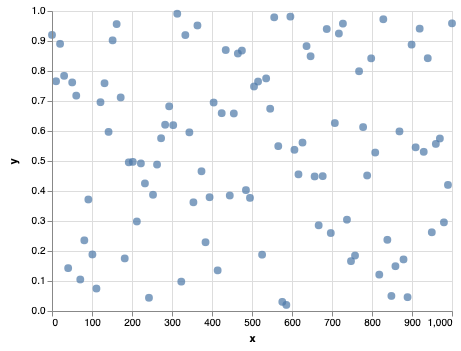

In [195]:
chart_1 = alt.Chart(source).encode(
        x='x',
        y='y').mark_circle(size=60)
chart_1

In [196]:
import numpy as np

n_points = 1000
y_samp = np.linspace(0,1,n_points)
X,Y = np.mgrid[0:1:1/n_points,0:1:1/n_points]

In [197]:
np.min(Y), np.max(Y), np.mean(Y)

(0.0, 0.999, 0.4995)

In [209]:
Y_SAMP = np.expand_dims(y_samp, axis=1)
Y_SAMP.dtype

dtype('float64')

In [222]:
(eig_vecs*eigenvals_sentences).dot(eig_vecs.T)

array([[ 1.00000000e+00,  8.80914265e-20, -5.42101086e-19, ...,
        -1.38777878e-17, -1.38777878e-17,  1.38777878e-17],
       [ 8.13151629e-20,  9.99999994e-01, -1.20180210e-08, ...,
        -5.99098348e-06, -5.99699249e-06, -6.00300150e-06],
       [-5.42101086e-19, -1.20180210e-08,  9.99999976e-01, ...,
        -1.19819670e-05, -1.19939850e-05, -1.20060030e-05],
       ...,
       [-1.73472348e-17, -5.99098348e-06, -1.19819670e-05, ...,
         9.94026989e-01, -5.97900151e-03, -5.98499250e-03],
       [-1.38777878e-17, -5.99699249e-06, -1.19939850e-05, ...,
        -5.97900151e-03,  9.94015001e-01, -5.99099550e-03],
       [-6.93889390e-18, -6.00300150e-06, -1.20060030e-05, ...,
        -5.98499250e-03, -5.99099550e-03,  9.94003002e-01]])

In [240]:
np.max(eig_vecs), np.min(eig_vecs)

(0.9999999969954948, -0.05475855412284743)

In [241]:
np.max(eig_vals), np.min(eig_vals)

(1.000000000000004, -0.9999999999999991)

In [281]:
#eig_vecs, _ = qr(Y[0].reshape([int(n_points/1),1]))
eig_vecs, _ = qr(Y_SAMP)
eig_vals  = LA.eigvals(eig_vecs).astype('float64')
DPP = FiniteDPP(kernel_type='likelihood',
                **{'L': (eig_vecs * eig_vals).dot(eig_vecs.T)})
# DPP = FiniteDPP('correlation', projection=False, 
#                 **{'K': (eig_vecs*eig_vals).dot(eig_vecs.T)})
# # DPP = FiniteDPP('correlation',
#                 **{'K_eig_dec': (eig_vals, eig_vecs)})

/Users/rsilvei/Envs/nlp_new/lib/python3.6/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [383]:
DPP.flush_samples()
n_sample = 100
DPP.sample_exact_k_dpp(mode='GS', size=n_sample)    

In [384]:
samp = DPP.list_of_samples
samp

[array([871, 315, 949, 786, 784, 631, 110, 124, 538, 927, 234, 548, 581,
        618, 351, 410,  46, 957, 762, 856, 395,  52, 608, 381, 783, 892,
        990, 102, 343, 707, 304, 216, 967, 467, 747, 112,  25, 936, 525,
        625, 325, 698, 276, 984,  93, 218,  40,  29, 994, 758, 870, 265,
        532, 404,  87, 602, 504, 795, 654, 231,  72, 913, 917, 390, 413,
        160, 958, 187, 320, 210, 352, 845, 872, 487, 787,  66, 617, 259,
          0, 147, 586, 397, 156, 673, 965, 889, 713,   2, 881, 535, 749,
        230, 865, 186, 802, 492, 363, 549, 709, 347])]

In [385]:
y_dpp = np.array([Y[0][i] for i in samp]).squeeze()
y_dpp

array([0.871, 0.315, 0.949, 0.786, 0.784, 0.631, 0.11 , 0.124, 0.538,
       0.927, 0.234, 0.548, 0.581, 0.618, 0.351, 0.41 , 0.046, 0.957,
       0.762, 0.856, 0.395, 0.052, 0.608, 0.381, 0.783, 0.892, 0.99 ,
       0.102, 0.343, 0.707, 0.304, 0.216, 0.967, 0.467, 0.747, 0.112,
       0.025, 0.936, 0.525, 0.625, 0.325, 0.698, 0.276, 0.984, 0.093,
       0.218, 0.04 , 0.029, 0.994, 0.758, 0.87 , 0.265, 0.532, 0.404,
       0.087, 0.602, 0.504, 0.795, 0.654, 0.231, 0.072, 0.913, 0.917,
       0.39 , 0.413, 0.16 , 0.958, 0.187, 0.32 , 0.21 , 0.352, 0.845,
       0.872, 0.487, 0.787, 0.066, 0.617, 0.259, 0.   , 0.147, 0.586,
       0.397, 0.156, 0.673, 0.965, 0.889, 0.713, 0.002, 0.881, 0.535,
       0.749, 0.23 , 0.865, 0.186, 0.802, 0.492, 0.363, 0.549, 0.709,
       0.347])

In [386]:
x = np.linspace(0,max_x,n_sample)
source_2 = pd.DataFrame(data = {'x':x,'y':y_dpp}, columns=['x','y'])
source_2.tail()

,x,y
95,959.59596,0.492
96,969.69697,0.363
97,979.79798,0.549
98,989.89899,0.709
99,1000.00000,0.347


/Users/rsilvei/Envs/nlp_new/lib/python3.6/site-packages/altair/utils/core.py:284: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


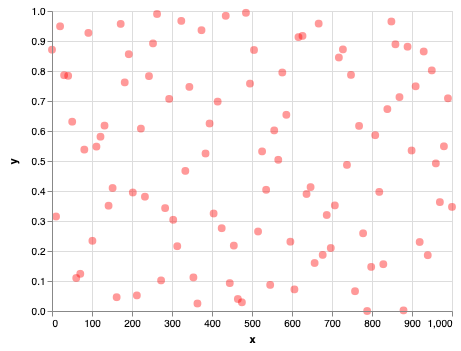

In [387]:
chart_2 = alt.Chart(source_2).encode(
        x='x',
        y='y').mark_circle(
        size=60,
        opacity=0.4, 
        color='red')
chart_2

/Users/rsilvei/Envs/nlp_new/lib/python3.6/site-packages/altair/utils/core.py:284: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


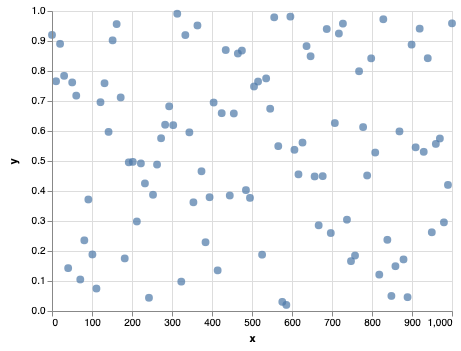

In [388]:
chart_1

/Users/rsilvei/Envs/nlp_new/lib/python3.6/site-packages/altair/utils/core.py:284: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


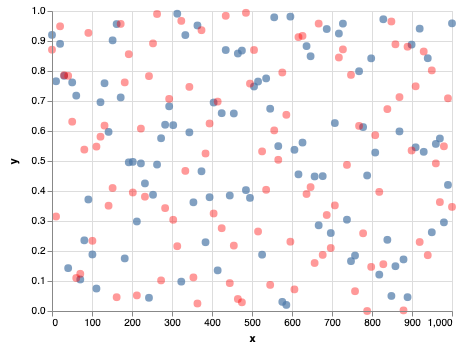

In [389]:
chart_1+chart_2